Подключаем библиотеки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vgsales4.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.106911,Club Penguin: Elite Penguin Force,DS,2008.0,1.0,Disney Interactive Studios,0.994269,63.0,0.00,27,3.16
1,1.000000,Secret Files: Tunguska,PC,2006.0,1.0,DreamCatcher Interactive,0.000000,4.0,0.00,1,0.05
2,0.999848,ECW Anarchy Rulz,PS,1999.0,2.0,Acclaim Entertainment,0.017439,4.0,0.00,1,0.11
3,1.000000,Taiko no Tatsujin: Waku Waku Anime Matsuri,PS2,2003.0,3.0,Namco Bandai Games,0.000000,0.0,0.20,0,0.20
4,0.999853,Breakout,PS,1999.0,5.0,Hasbro Interactive,0.017140,4.0,0.00,1,0.11
...,...,...,...,...,...,...,...,...,...,...,...
548,1.000000,Genkai Totsuki Moero Chronicle,PSV,2014.0,7.0,Compile Heart,0.000000,0.0,0.08,0,0.08
549,1.000000,GoGo's Crazy Bones,DS,2012.0,0.0,GameMill Entertainment,0.000000,4.0,0.00,0,0.04
550,1.000000,Yokai Watch Busters,3DS,2015.0,0.0,Level 5,0.000000,0.0,2.28,0,2.28
551,0.999958,Princess on Ice,DS,2008.0,10.0,505 Games,0.009195,1.0,0.00,0,0.05


Преобразовываем строковые значения в бинарные.

In [3]:
from sklearn.preprocessing import OrdinalEncoder

Oenc = OrdinalEncoder()
df[['Name', 'Platform', 'Year', 'Publisher']] = Oenc.fit_transform(df[['Name', 'Platform', 'Year', 'Publisher']])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.106911,66.0,3.0,19.0,1.0,29.0,0.994269,63.0,0.00,27,3.16
1,1.000000,394.0,10.0,17.0,1.0,30.0,0.000000,4.0,0.00,1,0.05
2,0.999848,110.0,11.0,10.0,2.0,5.0,0.017439,4.0,0.00,1,0.11
3,1.000000,447.0,12.0,14.0,3.0,87.0,0.000000,0.0,0.20,0,0.20
4,0.999853,44.0,11.0,10.0,5.0,50.0,0.017140,4.0,0.00,1,0.11
...,...,...,...,...,...,...,...,...,...,...,...
548,1.000000,152.0,16.0,25.0,7.0,23.0,0.000000,0.0,0.08,0,0.08
549,1.000000,154.0,3.0,23.0,0.0,44.0,0.000000,4.0,0.00,0,0.04
550,1.000000,526.0,2.0,26.0,0.0,70.0,0.000000,0.0,2.28,0,2.28
551,0.999958,351.0,3.0,19.0,10.0,1.0,0.009195,1.0,0.00,0,0.05


При использовании метода кодирования OneHotEncoder для столбца "Genre" мы выбираем этот метод, потому что он обеспечивает баланс между количеством единиц и нулей в результирующих бинарных признаках.

In [4]:
from sklearn.preprocessing import OneHotEncoder

OHenc = OneHotEncoder()
df['Genre'] = OHenc.fit_transform(df[['Genre']]).toarray()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.106911,66.0,3.0,19.0,0.0,29.0,0.994269,63.0,0.00,27,3.16
1,1.000000,394.0,10.0,17.0,0.0,30.0,0.000000,4.0,0.00,1,0.05
2,0.999848,110.0,11.0,10.0,0.0,5.0,0.017439,4.0,0.00,1,0.11
3,1.000000,447.0,12.0,14.0,0.0,87.0,0.000000,0.0,0.20,0,0.20
4,0.999853,44.0,11.0,10.0,0.0,50.0,0.017140,4.0,0.00,1,0.11
...,...,...,...,...,...,...,...,...,...,...,...
548,1.000000,152.0,16.0,25.0,0.0,23.0,0.000000,0.0,0.08,0,0.08
549,1.000000,154.0,3.0,23.0,1.0,44.0,0.000000,4.0,0.00,0,0.04
550,1.000000,526.0,2.0,26.0,1.0,70.0,0.000000,0.0,2.28,0,2.28
551,0.999958,351.0,3.0,19.0,0.0,1.0,0.009195,1.0,0.00,0,0.05


Далее обучаем дерево решений без использования гиперпараметров с помощью библиотеки "train_test_split"

In [5]:
from sklearn.model_selection import train_test_split

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y)

Удаляем пустные поля.

In [10]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]

Обучаем данные с помощью библиотеки DecisionTreeClassifier.

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier()
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])

Создание графика

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.999\ngini = 0.314\nsamples = 41\nvalue = [33, 8]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[5] <= 0.119\ngini = 0.454\nsamples = 23\nvalue = [15, 8]'),
 Text(0.16666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.6428571428571429, 'x[9] <= 3.535\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 37.0\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[4] <= 99.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6666666666666666, 0.21428571428571427, 'x[4] <= 109.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.07142857142857142, 'gini = 0

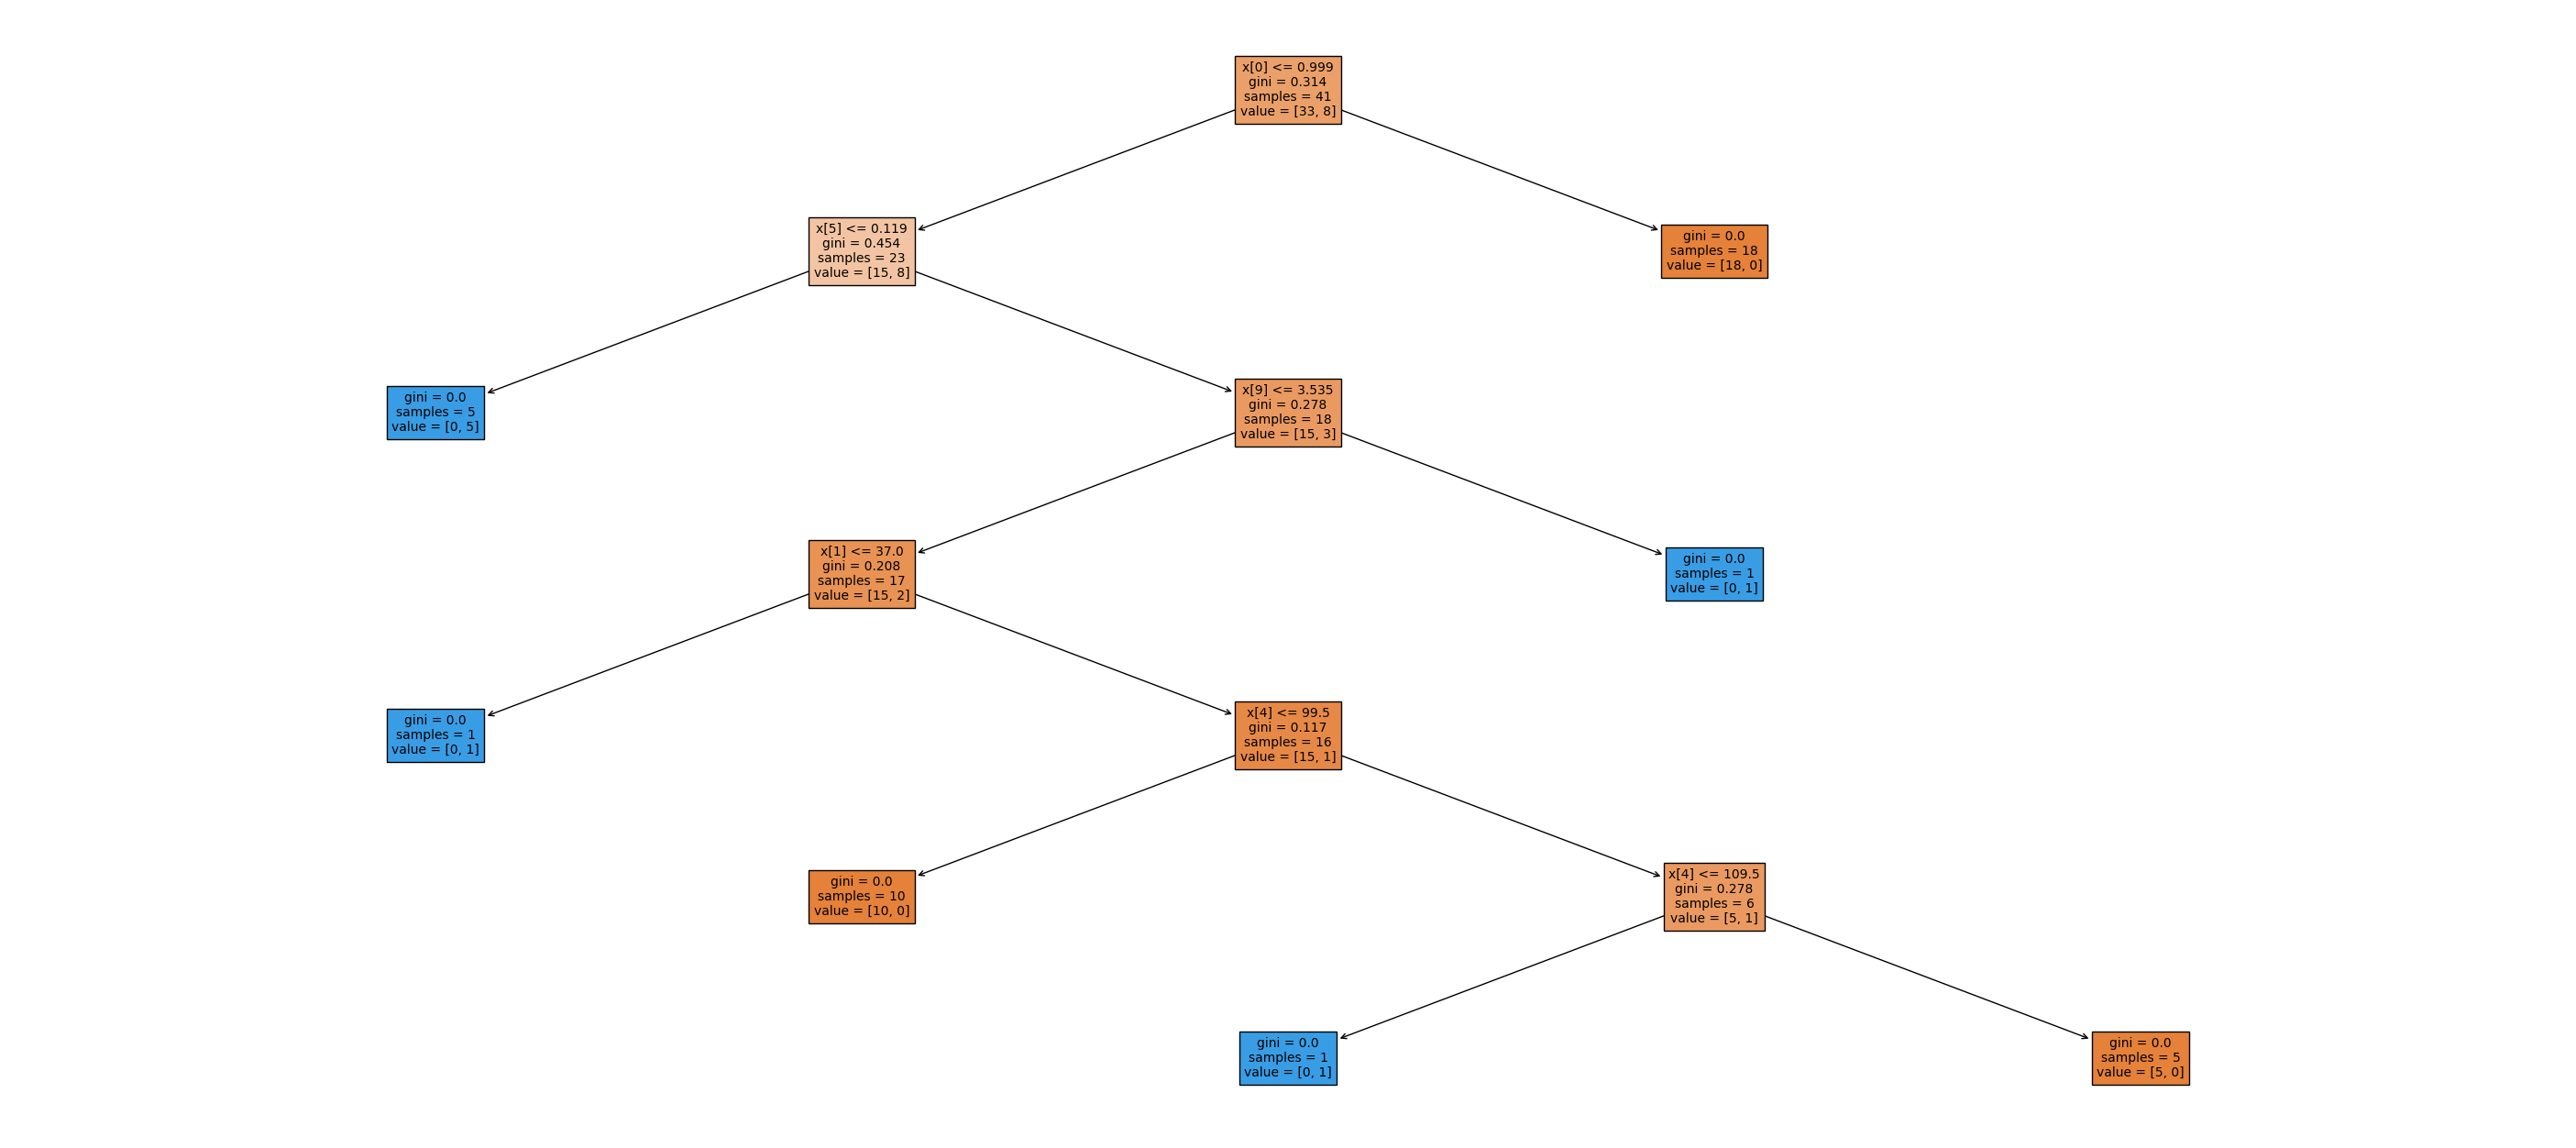

In [12]:
from sklearn import tree
plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

Удаление пустых полей.

In [23]:
x_test = x_test.dropna()
y_test = y_test[x_test.index]

Далее проводим анализ точности модели.

Text(50.722222222222214, 0.5, 'Реально')

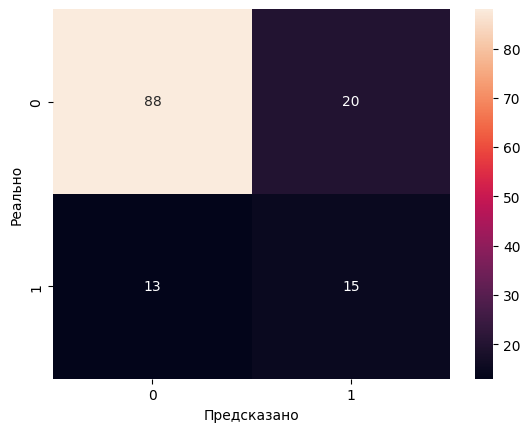

In [24]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

Вывод результатов.

In [25]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.7573529411764706
Чувствительность 0.5357142857142857
Аккуратность 0.42857142857142855
Финальная 0.47619047619047616



Полученные метрики дают следующую информацию:

Точность: 75%. Эта метрика показывает, что около 75% предсказаний модели являются верными.
Чувствительность: 53%. Эта метрика указывает, что модель правильно определяет около 53% из всех фактически положительных случаев.
Аккуратность: 42%. Аккуратность означает, что около 42% из всех предсказанных моделью положительных случаев действительно являются правильными.
Финальная: 47%. Эта метрика представляет собой сбалансированное сочетание точности и чувствительности. Значение финальной метрики в данном случае составляет около 47%, что говорит о том, что модель достигла сбалансированного уровня между точностью и чувствительностью.

Далее делаем тоже самое, но уже с гиперпараметрами.

[Text(0.7142857142857143, 0.9166666666666666, 'x[1] <= 333.0\ngini = 0.268\nsamples = 44\nvalue = [37, 7]'),
 Text(0.5714285714285714, 0.75, 'x[0] <= 1.0\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= 1.0\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[2] <= 12.0\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.25, 'x[6] <= 6.5\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5714285714285714, 0.4166666666666667, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.7142857142857143, 0.5833333333333334, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8571428571428571, 0.75, 'gini = 0.0\nsa

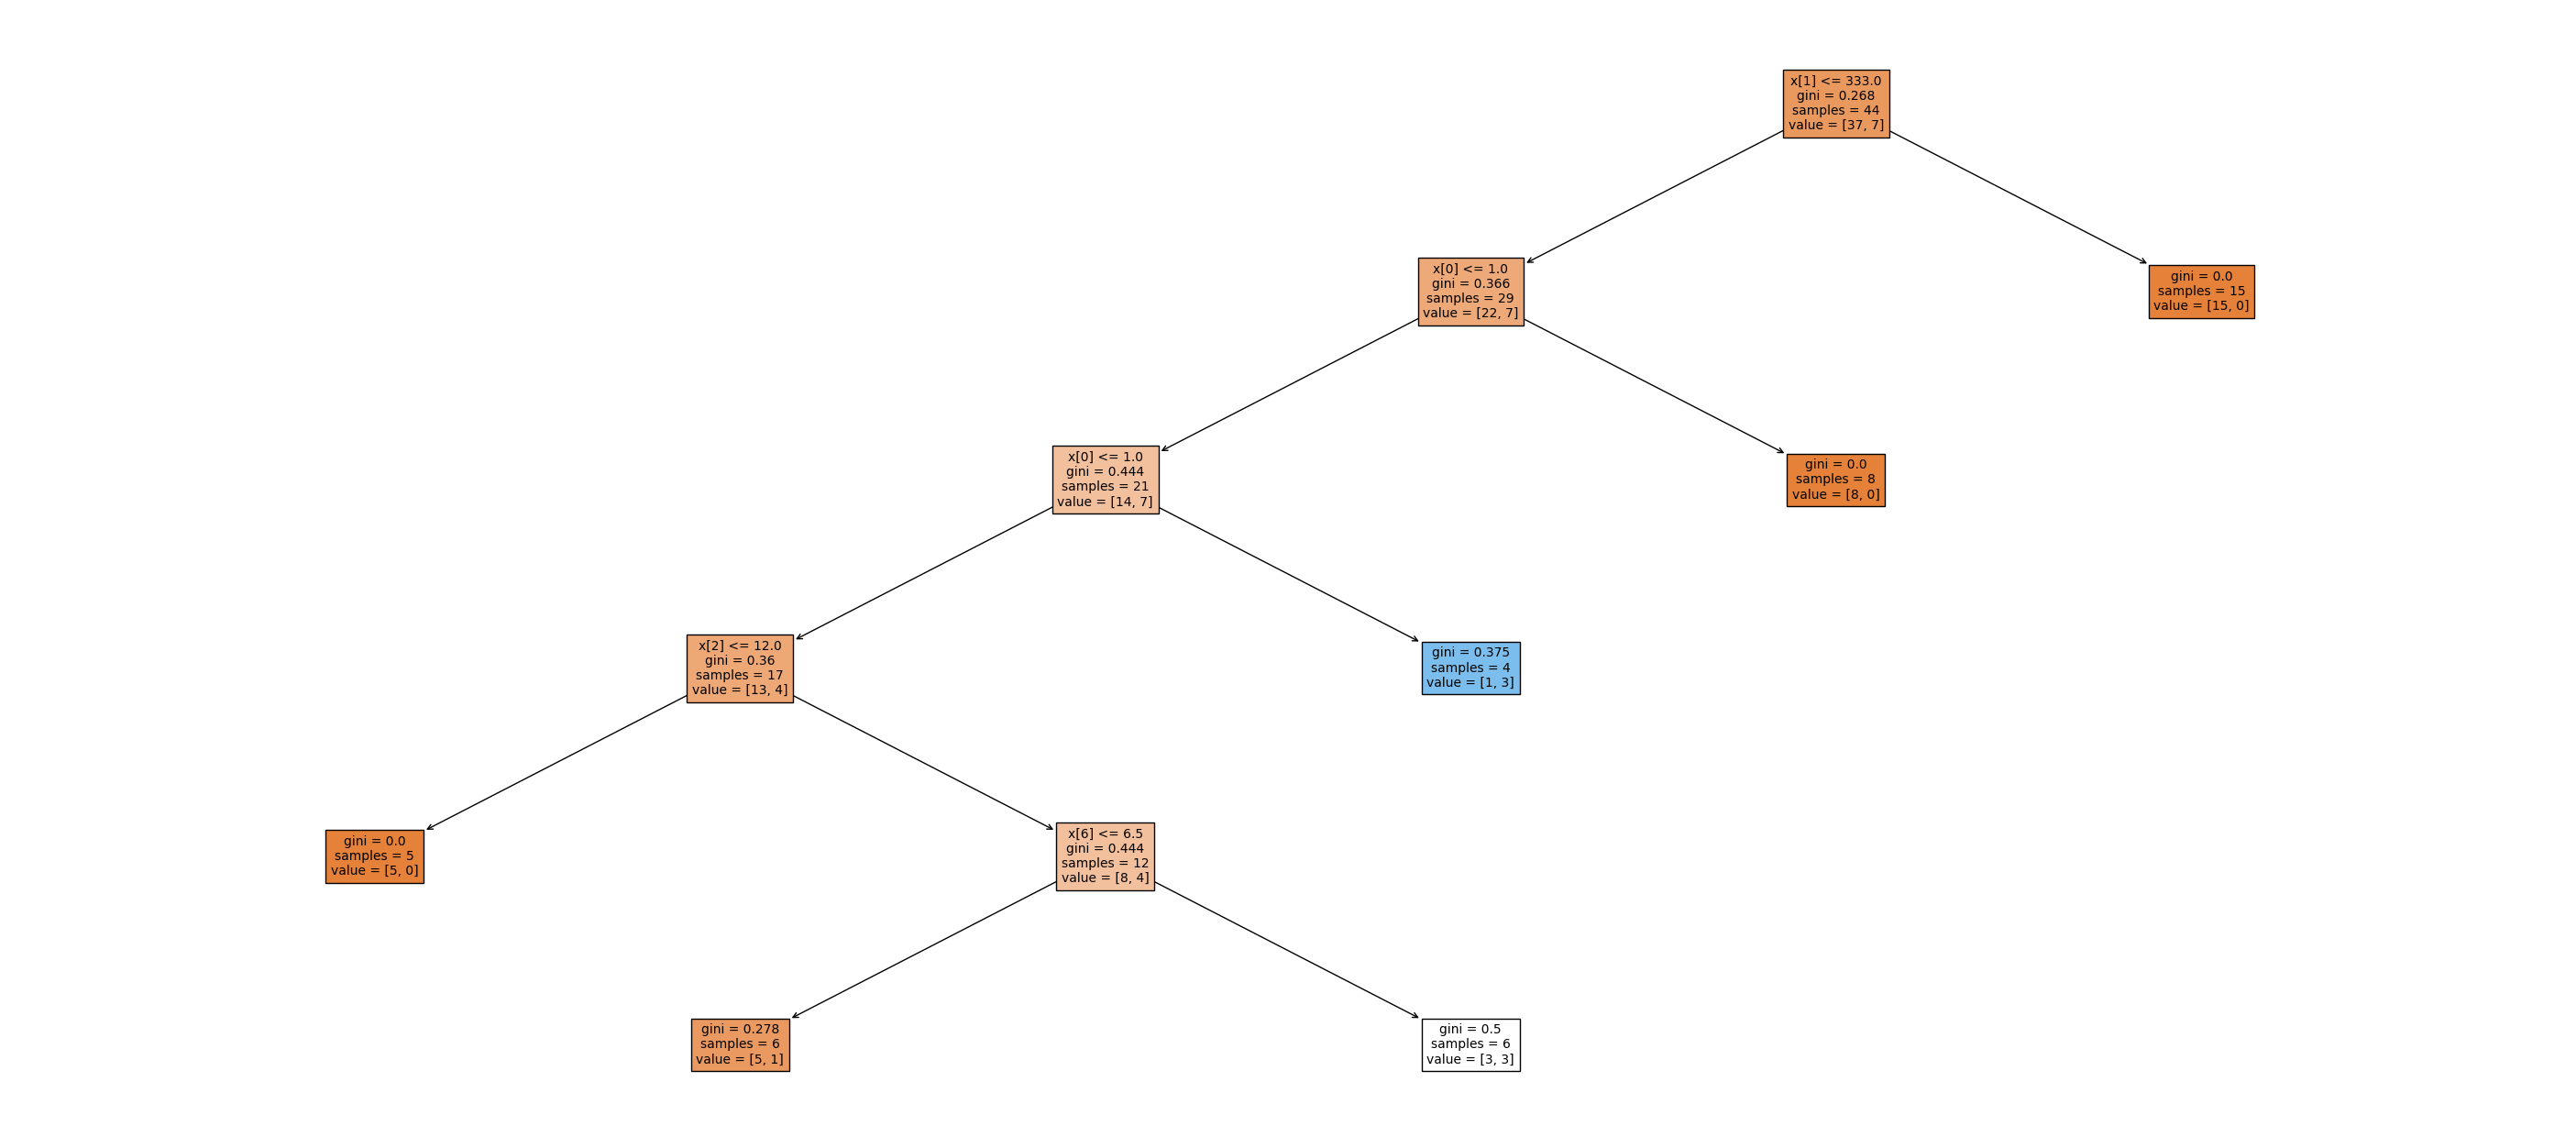

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

x_train = x_train.dropna()
y_train = y_train[x_train.index]

dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=200)
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])

plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

In [29]:
x_test = x_test.dropna()
y_test = y_test[x_test.index]

Text(50.722222222222214, 0.5, 'Реально')

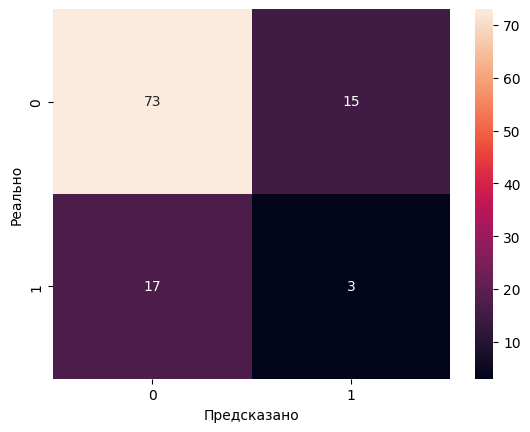

In [30]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

In [31]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.7037037037037037
Чувствительность 0.15
Аккуратность 0.16666666666666666
Финальная 0.15789473684210525



Полученные метрики дают следующую информацию:

Точность: 70%. Эта метрика показывает, что около 70% предсказаний модели являются верными.
Чувствительность: 15%. Эта метрика указывает, что модель правильно определяет около 15% из всех фактически положительных случаев.
Аккуратность: 16%. Аккуратность означает, что около 16% из всех предсказанных моделью положительных случаев действительно являются правильными.
Финальная: 15%. Эта метрика представляет собой сбалансированное сочетание точности и чувствительности. Значение финальной метрики в данном случае составляет около 15%, что говорит о том, что модель достигла сбалансированного уровня между точностью и чувствительностью.